diabetes 130데이터는 미국 130 개 병원 및 통합 전달 네트워크에서 10년간의(1999-2008) 임상 치료를 나타냅니다.
여기에는 환자 및 병원 결과를 나타내는 50 개 이상의 변수가 포함되어 있습니다.
다음 기준을 충족하는 환자에 대한 정보가 데이터로 추출되었습니다.

 - 입원 환자의 만남 입니다.
 - 당뇨병 환자의 당뇨병 진단으로 시스템에 입력되었습니다.
 - 체류 기간은 최소 1 일, 최대 14 일이었습니다.
 - 만남 중에 실험실 테스트가 수행되었습니다.
 - 만남 중에 약물이 투여되었습니다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandasModule as pdm

자주 쓰는 함수를 pandasModule이라는 클래스로 미리 만들어 놓았습니다.

먼저 데이터를 불러오고 정보를 살펴봅니다.

In [2]:
pdm = pdm.pandasModule
df = pd.read_csv('./data/diabetic_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

각 컬럼에 대한 정보 입니다. 컬럼에서 y값을 정하는게 중요한데 저는 readmitted를 y 컬럼으로 정했으며
30일 이내에 재방문할 예측 모델을 구현하려 합니다.

환자가 일부 병원에서 재입 원할 것인지 아는 것이 중요합니다. 그 이유는 재 입원을 피하기 위해 치료법을 변경할 수 있기 때문입니다.

 - encounter_id : 고유 식별자
 - patient_nbr : 환자의 고유 식별 번호
 - race : 인종
 - gender : 남성, 여성 및 알 수 없음 / 무효
 - age : 10 년 간격으로 그룹화 된 연령 : 0, 10), 10, 20),…, 90, 100)
 - weight : 무게 (파운드)
 - admission_type_id : 9 개의 고유 값에 해당하는 정수 식별자 (예 : 긴급, 긴급, 선택, 신생아 및 사용할 수 없음)
 - discharge_disposition_id : 퇴원 처리 29 개의 고유 값에 해당하는 정수 식별자 (예 : 집으로 퇴원, 만료 및 사용할 수 없음)
 - admission_source_id : 21 개의 고유 한 값에 해당하는 정수 식별자 (예 : 의사 소개, 응급실 및 병원에서 전송)
 - time_in_hospital : 입원과 퇴원 사이의 정수 일수
 - payer_code : 23 개의 고유 값에 해당하는 정수 식별자 (예 : Blue Cross / Blue Shield, Medicare 및 자기 부담 의료)
 - medical_specialty : 입원 의사의 전문 분야에 대한 정수 식별자 (예 : 심장학, 내과, 가족 / 일반 진료, 외과의)
 - num_lab_procedures : 실험실 절차 수 만남 중 수행 된 실험실 테스트 수
 - num_procedures : 절차 수 숫자 만남 중 수행 된 절차 (실험실 테스트 제외)의 수
 - num_medications : 투약 횟수 만남 중 투여 된 고유 한 일반 이름의 수
 - number_outpatient : 외래 방문 횟수 만남 전 해에 환자의 외래 방문 횟수
 - number_emergency : 응급 방문 횟수 만남 전 1 년 동안 환자의 응급 방문 횟수
 - number_inpatient : 입원 환자 방문수 만남 전년도에 환자의 입원 환자 방문수
 - diag_1 : 1 차 진단 (ICD9의 처음 세 자리로 코딩 됨); 848 개의 고유 값
 - diag_2 : 이차 진단 (ICD9의 처음 세 자리로 코딩 됨); 923 개의 고유 값
 - diag_3 : 추가 이차 진단 (ICD9의 처음 세 자리로 코딩 됨); 954 개의 고유 값
 - number_diagnoses : 진단 수 시스템에 입력 된 진단 수 0 %
 - max_glu_serum : 포도당 혈청 검사 결과 결과의 범위 또는 검사를받지 않았는지 여부를 나타냅니다.
                   값 : "> 200", "> 300", "normal"및 측정되지 않은 경우 "none"

 * A1C 검사는 지난 2 ~ 3 개월 동안 혈중 포도당 평균 수치를 측정하는 혈액 검사입니다.
   이 검사는 당뇨병 환자에게 혈당치가 얼마나 잘 조절되는지를 확인하는 데 사용되며 당뇨병 진단에 사용될 수 있습니다 .

 - A1Cresult : A1c 테스트 결과 결과의 범위 또는 테스트가 수행되지 않았는지 여부를 나타냅니다.
               값 : 결과가 8 %보다 크면 "> 8", 결과가 7 %보다 크지 만 8 %보다 작 으면 "> 7",
                    결과가 7 %보다 작 으면 "normal", 다음의 경우 "none" 측정되지 않았습니다.

 - 약물에 대한 24 가지 기능 일반 이름 : 메트포르민, 레파 글리 니드, 나테 글리 니드, 클로르 프로 파 미드, 글리메피리드, 아세토 헥사 미드, 글 리피 지드,
                                글리 부 리드, 톨 부타 미드, 피오글리타존, 로시글리타존, 아카보스, 미글 리톨, 트로글리타존, 톨 라자 미드,
                                글 리피 지드, 시타 글 립틴, 인슐린, 글 리피 지드 -metformin, glimepiride- pioglitazone,
                                metformin-rosiglitazone 및 metformin-pioglitazone,이 기능은 약물이 처방되었는지 또는 복용량이
                                변경되었는지 여부를 나타냅니다.

                                값 : 만남 중에 용량이 증가하면 "up", 용량이 감소하면 "down", 용량이 변경되지 않은 경우 "steady",
                                    약물이 처방되지 않은 경우 "no"

metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide
glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone
tolazamide, examide, citoglipton, insulin, glyburide-metformin, glipizide-metformin
glimepiride-pioglitazone, metformin-rosiglitazone, metformin-pioglitazone
change : 당뇨병 약물 (용량 또는 일반 이름)이 변경되었는지 여부를 나타냅니다. 값 : "변경"및 "변경 없음"
diabetesMed : 처방 된 당뇨병 약이 있는지 여부를 나타냅니다. 값 : "예"및 "아니요"

In [3]:
# 코딩할때 자동완성이 될 수 있도록 변수에 값들을 미리 넣었습니다.
encounter_id = 'encounter_id'
patient_nbr = 'patient_nbr'
race = 'race'
gender = 'gender'
age = 'age'
weight = 'weight'
admission_type_id = 'admission_type_id'
discharge_disposition_id = 'discharge_disposition_id'
admission_source_id = 'admission_source_id'
time_in_hospital = 'time_in_hospital'
payer_code = 'payer_code'
medical_specialty = 'medical_specialty'
num_lab_procedures = 'num_lab_procedures'
num_procedures = 'num_procedures'
num_medications = 'num_medications'
number_outpatient = 'number_outpatient'
number_emergency = 'number_emergency'
number_inpatient = 'number_inpatient'
diag_1 = 'diag_1'
diag_2 = 'diag_2'
diag_3 = 'diag_3'
number_diagnoses = 'number_diagnoses'
max_glu_serum = 'max_glu_serum'
A1Cresult = 'A1Cresult'
metformin = 'metformin'
repaglinide = 'repaglinide'
nateglinide = 'nateglinide'
chlorpropamide = 'chlorpropamide'
glimepiride = 'glimepiride'
acetohexamide = 'acetohexamide'
glipizide = 'glipizide'
glyburide = 'glyburide'
tolbutamide = 'tolbutamide'
pioglitazone = 'pioglitazone'
rosiglitazone = 'rosiglitazone'
acarbose = 'acarbose'
miglitol = 'miglitol'
troglitazone = 'troglitazone'
tolazamide = 'tolazamide'
examide = 'examide'
citoglipton = 'citoglipton'
insulin = 'insulin'
glyburideMetformin = 'glyburide-metformin'
glipizideMetformin = 'glipizide-metformin'
glimepiridePioglitazone = 'glimepiride-pioglitazone'
metforminRosiglitazone = 'metformin-rosiglitazone'
metforminPioglitazone = 'metformin-pioglitazone'
change = 'change'
diabetesMed = 'diabetesMed'
readmitted = 'readmitted'

df.shape

(101766, 50)

각 컬럼에 대한 고유값들과 고유값들의 갯수를 파악해봅니다.

In [4]:
pdm.showUniqueInfos(df)

#########encounter_id#########
96210942     1
89943846     1
384306986    1
94650156     1
83156784     1
            ..
74454612     1
208073976    1
166229592    1
38340702     1
77856768     1
Name: encounter_id, Length: 101766, dtype: int64


#########patient_nbr#########
88785891     40
43140906     28
23199021     23
1660293      23
88227540     23
             ..
71081460      1
30060018      1
67443444      1
141344240     1
93251151      1
Name: patient_nbr, Length: 71518, dtype: int64


#########race#########
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


#########gender#########
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64


#########age#########
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10

No    54755
Ch    47011
Name: change, dtype: int64


#########diabetesMed#########
Yes    78363
No     23403
Name: diabetesMed, dtype: int64


#########readmitted#########
NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64




우선 데이터에서 결측치가 많거나 학습에 도움이 안되거나 심각한 불균형한 데이터들 삭제부터 시작합니다.

    encounter_id : 학습에 도움 안되는 고유값 입니다.
    patient_nbr : 마찬가지로 학습에 도움 안되는 고유값 입니다.
    weight : ? 값이 심각하게 많아서 삭제합니다.
    admission_type_id : 마찬가지로 학습에 도움 안되는 고유값 입니다.
    discharge_disposition_id : 마찬가지로 학습에 도움 안되는 고유값 입니다.
    admission_source_id : 마찬가지로 학습에 도움 안되는 고유값 입니다.
    payer_code : 마찬가지로 학습에 도움 안되는 고유값 입니다.
    medical_specialty : ?값이 심각하게 많고 변수가 가진 의미가 학습에 도움이 되질 않아 삭제 합니다.

    Number of medications : Number of distinct generic names administered during the encounter
    번역하면 만남 중 관리되는 고유 한 일반 이름의 수 입니다.
    num_medications : 정확한 정보는 잘 모르겠으나 마찬가지로 학습에 도움 안되는 고유값으로 판단하였습니다.

    다음 컬럼 삭제 목록은 Steady threshold 값을 100이하이면 삭제 하는것으로 정했습니다.

    #########acetohexamide#########
    No        101765
    Steady         1
    acetohexamide : 위와 같이 데이터가 심각하게 불균형하며 Steady가 100넘지 않습니다.

    #########tolbutamide#########
    No        101743
    Steady        23
    tolbutamide : 위와 같이 데이터가 심각하게 불균형하며 Steady가 100넘지 않습니다.

    #########troglitazone#########
    No        101763
    Steady         3
    troglitazone : 위와 같이 데이터가 심각하게 불균형하며 Steady가 100넘지 않습니다.

    #########tolazamide#########
    No        101727
    Steady        38
    Up             1
    tolazamide : 위와 같이 데이터가 심각하게 불균형하며 Steady가 100넘지 않습니다.

    #########examide#########
    No    101766
    examide : 위와 같이 데이터가 심각하게 불균형하며 Steady가 100넘지 않습니다.

    #########citoglipton#########
    No    101766
    citoglipton : 위와 같이 데이터가 심각하게 불균형하며 Steady가 100넘지 않습니다.

    #########glipizide-metformin#########
    No        101753
    Steady        13
    glipizideMetformin : 위와 같이 데이터가 심각하게 불균형하며 Steady가 100넘지 않습니다.

    #########glimepiride-pioglitazone#########
    No        101765
    Steady         1
    glimepiridePioglitazone : 위와 같이 데이터가 심각하게 불균형하며 Steady가 100넘지 않습니다.

    #########metformin-rosiglitazone#########
    No        101764
    Steady         2
    metforminRosiglitazone : 위와 같이 데이터가 심각하게 불균형하며 Steady가 100넘지 않습니다.

    #########metformin-pioglitazone#########
    No        101765
    Steady         1
    metforminPioglitazone : 위와 같이 데이터가 심각하게 불균형하며 Steady가 100넘지 않습니다.

이렇게 쓰지 않을 컬럼들을 삭제해줍니다.

In [5]:
df = pdm.dropColum(df, [
    encounter_id,
    patient_nbr,
    weight,
    admission_type_id,
    discharge_disposition_id,
    admission_source_id,
    payer_code,
    medical_specialty,
    num_medications,
    acetohexamide,
    tolbutamide,
    troglitazone,
    tolazamide,
    examide,
    citoglipton,
    glipizideMetformin,
    glimepiridePioglitazone,
    metforminRosiglitazone,
    metforminPioglitazone
])

삭제하고 데이터를 확인 합니다.

이제 쓰지 않을 컬럼들은 삭제했고 각 변수의 값들에 문제되는 값들을 제거해줍니다. 데이터의 갯수가 충분하지
않다면 삭제하기 보다는 값을 적절하게 채워주겠지만 데이터가 10만개나 되므로 데이터를 제거해도 무방하겠습니다.

먼저 race에서 ? 값을 가진 row들을 제거해 줍니다. 2273개의 row를 제거합니다.
그리고 gender에서 Unknown/Invalid 값을 가진 row를 제거합니다. 3개 밖에 안됩니다.

In [6]:
pdm.showUniqueInfos(df)
df.info()

#########race#########
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


#########gender#########
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64


#########age#########
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64


#########time_in_hospital#########
3     17756
2     17224
1     14208
4     13924
5      9966
6      7539
7      5859
8      4391
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: time_in_hospital, dtype: int64


#########num_lab_procedures#########
1      3208
43     2804
44     2496
45     2376
38     2213
       ... 
107       1
118       1
129       1
120       1
121       1
Name: num_lab_procedures, Length

In [7]:
pdm.deleteRow(df, race, '?')

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


In [8]:
pdm.deleteRow(df, gender, "Unknown/Invalid")

Female    53575
Male      45917
Name: gender, dtype: int64


그리고 고유값이 유난히 많던 diag_1~3의 컬럼들 고유값을 찍어봅니다.

In [9]:
df['diag_1'].unique()

array(['250.83', '276', '648', '8', '197', '414', '428', '398', '434',
       '250.7', '157', '518', '999', '410', '682', '402', 'V57', '189',
       '786', '427', '996', '277', '584', '462', '473', '411', '174',
       '486', '998', '511', '432', '626', '295', '196', '250.6', '182',
       '845', '423', '808', '250.4', '722', '403', '250.11', '784', '707',
       '440', '151', '715', '997', '198', '564', '38', '590', '578',
       '250.32', '433', '569', '185', '536', '255', '250.13', '599',
       '558', '574', '491', '560', '244', '250.03', '577', '730', '188',
       '824', '250.8', '332', '562', '291', '296', '510', '401', '263',
       '438', '70', '250.02', '493', '642', '571', '738', '593', '618',
       '250.42', '807', '456', '446', '572', '575', '250.41', '820',
       '515', '780', '250.22', '995', '235', '250.82', '721', '787',
       '556', '162', '724', '282', '514', 'V55', '281', '250.33', '530',
       '466', '435', '250.12', 'V53', '789', '566', '822', '191', '557',
 

살펴보면 ? 값들이 있는데 문제 되는 값들이라 그냥 다 지워주고 확인해봅니다.

In [10]:
pdm.deleteRow(df, 'diag_1', '?')
pdm.deleteRow(df, 'diag_2', '?')
pdm.deleteRow(df, 'diag_3', '?')

428    6739
414    6406
786    3938
410    3518
486    3425
       ... 
704       1
939       1
640       1
477       1
61        1
Name: diag_1, Length: 714, dtype: int64
276    6635
428    6522
250    5879
427    4932
401    3641
       ... 
V13       1
704       1
140       1
388       1
752       1
Name: diag_2, Length: 745, dtype: int64
250     11208
401      8089
276      5097
428      4491
427      3865
        ...  
195         1
757         1
75          1
47          1
E882        1
Name: diag_3, Length: 786, dtype: int64


In [11]:
df['diag_1'].unique()
df['diag_2'].unique()
df['diag_3'].unique()

array(['255', 'V27', '403', '250', 'V45', '38', '486', '996', '197',
       '250.6', '427', '627', '414', '416', '582', 'V43', '250.01', '263',
       '250.42', '276', '482', '401', '250.41', '585', '781', '278',
       '998', '428', '568', '682', '250.02', '305', '707', '496', '599',
       '424', '518', '553', '794', '411', 'V42', '531', '511', '490',
       '562', '250.8', '250.7', '250.52', '784', '491', '581', '420',
       '724', '730', '789', '131', '250.82', '999', '41', '493', '250.03',
       '753', '786', '529', 'E888', '425', '595', '303', '560', '711',
       '8', '492', '332', '296', '438', '362', '250.4', '654', '244',
       'V70', '737', '625', '681', '250.51', '404', 'V10', '810', '280',
       '440', '785', '569', '272', '997', '250.43', '918', '584', '54',
       '788', '426', '722', '250.92', '196', '461', '535', '787', '891',
       '284', '458', '648', '780', '182', '285', '593', '413', '664',
       '564', '201', '356', 'V15', '292', '782', '715', '473', '455',


결측치도 확인해봅니다.
결측치를 확인해보니 존재하지 않습니다.

In [12]:
df.isnull().sum()

race                   0
gender                 0
age                    0
time_in_hospital       0
num_lab_procedures     0
num_procedures         0
number_outpatient      0
number_emergency       0
number_inpatient       0
diag_1                 0
diag_2                 0
diag_3                 0
number_diagnoses       0
max_glu_serum          0
A1Cresult              0
metformin              0
repaglinide            0
nateglinide            0
chlorpropamide         0
glimepiride            0
glipizide              0
glyburide              0
pioglitazone           0
rosiglitazone          0
acarbose               0
miglitol               0
insulin                0
glyburide-metformin    0
change                 0
diabetesMed            0
readmitted             0
dtype: int64

데이터 갯수 확인해보면
31개의 컬럼에 98052개의 데이터가 남았습니다. 학습하기에 충분합니다.

In [13]:
df.shape

(98052, 31)

중복 데이터 제거후 한번 더 확인해 봅니다.

In [14]:
df.drop_duplicates()
df.shape

(98052, 31)

이제 못쓰거나 안쓰는 컬럼과 로우를 다 제거 하였고 학습을 위해 데이터들을 모두 수치형으로
변환 시켜줍니다.

*주의*
참고로 수치형으로 바꿀때 남자와 여자처럼 binary한 변수는 0과 1로 바꾸어도 괜찮으나
수치가 연속형이지 않은 명목형 변수는 수치로 바로 바꾸어서는 안됩니다. 나이 같은 경우는
연속형 변수이므로 수치로 바꾸어도 무방하겠습니다.

*중요*
그리고 y컬럼인 readmitted 변수는 우리가 예측할 '<30' 30일이내에 병원을 재방문한값은 1로
나머지는 0으로 바꾸어 줍니다.

In [15]:
# 성별을 숫자로 식별하도록 바꾸기
changeGenderValueDict = {
    'Male': 1,
    'Female': 0,
}
changeValueDict = {
    'No': 0,
    'Ch': 1,
}
changeDiabetesMedValueDict = {
    'No': 0,
    'Yes': 1,
}
# 나이를 숫자로 식별하도록 바꾸기
changeAgeValueDict = {
    '[0-10)': 0,
    '[10-20)': 1,
    '[20-30)': 2,
    '[30-40)': 3,
    '[40-50)': 4,
    '[50-60)': 5,
    '[60-70)': 6,
    '[70-80)': 7,
    '[80-90)': 8,
    '[90-100)': 9,
}
changeReadmittedValueDict = {
    'NO': 0,
    '>30': 0,
    '<30': 1
}

df = df.replace({'gender': changeGenderValueDict})
df = df.replace({'change': changeValueDict})
df = df.replace({'diabetesMed': changeDiabetesMedValueDict})
df = df.replace({'age': changeAgeValueDict})
df = df.replace({'readmitted': changeReadmittedValueDict})

데이터들을 수치형으로 바꾸고 다시한번 고유값과 갯수를 찍어봅니다.

In [16]:
pdm.showUniqueInfos(df)

#########race#########
Caucasian          75079
AfricanAmerican    18881
Hispanic            1984
Other               1483
Asian                625
Name: race, dtype: int64


#########gender#########
0    52833
1    45219
Name: gender, dtype: int64


#########age#########
7    25305
6    21809
8    16702
5    16697
4     9265
3     3548
9     2717
2     1478
1      466
0       65
Name: age, dtype: int64


#########time_in_hospital#########
3     17049
2     16441
1     13489
4     13434
5      9699
6      7320
7      5694
8      4276
9      2928
10     2287
11     1809
12     1424
13     1185
14     1017
Name: time_in_hospital, dtype: int64


#########num_lab_procedures#########
1      3096
43     2724
44     2414
45     2306
38     2131
       ... 
107       1
118       1
129       1
120       1
121       1
Name: num_lab_procedures, Length: 118, dtype: int64


#########num_procedures#########
0    44574
1    20029
2    12383
3     9210
6     4811
4     4076
5     2969
Name: num_proced

이제 유난히 고유값이 많던 diag_1~3의 컬럼들을 전처리 해줍니다. 이 변수의 값들은 ICD-9의 값이며
ICD-9의 조건에 맞게 각 값들을 병명으로 바꾸어 줍니다.

In [17]:
# ICD - 9 코드 001-139의 목록 :infection 감염 및 기생 질환
# ICD - 9 코드 140-239의 목록 :tumor 종양
# ICD - 9 코드 240-279의 목록 :incretion 내분비, 영양 및 대사 질환, 그리고 면역 장애
# ICD - 9 코드 280-289의 목록 :blood 혈액 및 혈액 형성 기관의 질병
# ICD - 9 코드 290-319의 목록 :psychopathy 정신 질환
# ICD - 9 코드 320-359의 목록 :nerve 신경 계통의 질병
# ICD - 9 코드 360-389의 목록 :sensorial 감각 기관의 질병
# ICD - 9 코드 390-459의 목록 :circulatory 순환기 질병
# ICD - 9 코드 460-519의 목록 :breath 호흡 체계의 질병
# ICD - 9 코드 520-579의 목록 :digestive 소화기 계통의 질병
# ICD - 9 코드 580-629의 목록 :genitourinary 시스템의 질병
# ICD - 9 코드 630-676의 목록 :puerperium 임신 중 합병증 출산, 그리고 puerperium
# ICD - 9 코드 680-709의 목록 :skin 피부와 피하 조직의 질환
# ICD - 9 코드 710-739의 목록 :musculoskeletal 시스템 및 연결어의 질병 조직
# ICD - 9 코드 740-759의 목록 :inborn 선천적인 이상 현상
# ICD - 9 코드 760-779의 목록 :perinatal (출산 전후의) 특정 조건 perinatal 시대의 원산지
# ICD - 9 코드 780-799의 목록 :symptoms 증상, 징후, 그리고 병에 정의된 조건
# ICD - 9 코드 800-999의 목록 :poison 부상 및 중독
# ICD - 9 코드 목록 E와 V 코드 :injury 부상과 보완의 외부 원인 구분

def transferDiags(inputString):
    val = ''
    if inputString.isdigit():
        if 1 <= float(inputString) <= 139:
            val = "infection"
        elif 140 <= float(inputString) <= 239:
            val = "tumor"
        elif 240 <= float(inputString) <= 279:
            val = "incretion"
        elif 280 <= float(inputString) <= 289:
            val = "blood"
        elif 290 <= float(inputString) <= 319:
            val = "psychopathy"
        elif 320 <= float(inputString) <= 359:
            val = "nerve"
        elif 360 <= float(inputString) <= 389:
            val = "sensorial"
        elif 390 <= float(inputString) <= 459:
            val = "circulatory"
        elif 460 <= float(inputString) <= 519:
            val = "breath"
        elif 520 <= float(inputString) <= 579:
            val = "digestive"
        elif 580 <= float(inputString) <= 629:
            val = "genitourinary"
        elif 630 <= float(inputString) <= 679:
            val = "puerperium"
        elif 680 <= float(inputString) <= 709:
            val = "skin"
        elif 710 <= float(inputString) <= 739:
            val = "musculoskeletal"
        elif 740 <= float(inputString) <= 759:
            val = "inborn"
        elif 760 <= float(inputString) <= 779:
            val = "perinatal"
        elif 780 <= float(inputString) <= 799:
            val = "symptoms"
        elif 800 <= float(inputString) <= 999:
            val = "poison"
    else:
        if '.' in inputString:
            val = "diabetes"
        else:
            val = "injury"
    return val


# apply메소드의 lambda 함수는 공백까지 지우기 위해 사용한 코드입니다.
# 이렇게 중복으로도 사용 가능합니다.
df[diag_1] = df[diag_1].fillna("NONE")
df[diag_1] = df[diag_1].apply(transferDiags).apply(lambda x: x.replace(" ", ""))
df[diag_1].value_counts()

circulatory        29529
breath             10093
digestive           8928
diabetes            7774
symptoms            7427
poison              6703
genitourinary       4947
musculoskeletal     4739
tumor               3312
incretion           2783
infection           2689
skin                2438
psychopathy         2145
injury              1601
blood               1079
nerve                920
puerperium           645
sensorial            250
inborn                50
Name: diag_1, dtype: int64

In [18]:
df[diag_1].unique()

array(['incretion', 'puerperium', 'infection', 'tumor', 'circulatory',
       'diabetes', 'breath', 'poison', 'skin', 'injury', 'symptoms',
       'genitourinary', 'psychopathy', 'musculoskeletal', 'digestive',
       'nerve', 'blood', 'sensorial', 'inborn'], dtype=object)

In [19]:
df[diag_2] = df[diag_2].fillna("NONE")
df[diag_2] = df[diag_2].apply(transferDiags).apply(lambda x: x.replace(" ", ""))
df[diag_2].value_counts()
df[diag_2].unique()

array(['diabetes', 'incretion', 'tumor', 'circulatory', 'breath', 'blood',
       'poison', 'musculoskeletal', 'genitourinary', 'infection',
       'digestive', 'skin', 'injury', 'nerve', 'symptoms', 'psychopathy',
       'puerperium', 'inborn', 'sensorial'], dtype=object)

In [20]:
df[diag_3] = df[diag_3].fillna("NONE")
df[diag_3] = df[diag_3].apply(transferDiags).apply(lambda x: x.replace(" ", ""))
df[diag_3].value_counts()
df[diag_3].unique()

array(['incretion', 'injury', 'circulatory', 'infection', 'breath',
       'poison', 'tumor', 'diabetes', 'genitourinary', 'symptoms',
       'digestive', 'skin', 'psychopathy', 'musculoskeletal', 'inborn',
       'nerve', 'sensorial', 'puerperium', 'blood'], dtype=object)

각 diag 컬럼들 값을 병명으로 바꾸고 다시 한번 고유값들을 살펴보면 잘 바꾸어진것을 알 수 있습니다.

In [21]:
pdm.showUniqueInfos(df)

#########race#########
Caucasian          75079
AfricanAmerican    18881
Hispanic            1984
Other               1483
Asian                625
Name: race, dtype: int64


#########gender#########
0    52833
1    45219
Name: gender, dtype: int64


#########age#########
7    25305
6    21809
8    16702
5    16697
4     9265
3     3548
9     2717
2     1478
1      466
0       65
Name: age, dtype: int64


#########time_in_hospital#########
3     17049
2     16441
1     13489
4     13434
5      9699
6      7320
7      5694
8      4276
9      2928
10     2287
11     1809
12     1424
13     1185
14     1017
Name: time_in_hospital, dtype: int64


#########num_lab_procedures#########
1      3096
43     2724
44     2414
45     2306
38     2131
       ... 
107       1
118       1
129       1
120       1
121       1
Name: num_lab_procedures, Length: 118, dtype: int64


#########num_procedures#########
0    44574
1    20029
2    12383
3     9210
6     4811
4     4076
5     2969
Name: num_proced

이제 명목형 변수들을 one hot encoding해줍니다.

명목현 변수는 0, 1, 2로 바꾸면 0, 1인 이진형변수는 괜찮지만 0,1,2,3,~ 이렇게 바꾸면 학습할때 숫자 사이에
관련이 없음에도 관련이 있게 학습되고 그래프가 보여지기 때문에 명목형은 one hot encoding 해주어야 합니다.

예를 들어 국가라는 변수명이 있고 고유값들이 러시아, 코리아, 재팬, 아메리카 이렇게 있다면
변수를 고유값의 갯수만큼 생성하여야 합니다.
ex) 해당 로우가 러시아인이면
   러시아 | 코리아 | 재팬
    1       0      0

이런식으로 해줘야합니다. one hot encoding은 판다스의 get_dummies 함수로 쉽게 할 수 있습니다.

In [22]:
###########################################
############ ONE HOT ENCODING #############
###########################################
# 명목형 변수들은 one hot encoding을 해준다.
df = pd.get_dummies(df, columns=[
    race,
    max_glu_serum,
    diag_1,
    diag_2,
    diag_3,
    A1Cresult,
    metformin,
    repaglinide,
    nateglinide,
    chlorpropamide,
    glimepiride,
    glipizide,
    glyburide,
    pioglitazone,
    rosiglitazone,
    acarbose,
    miglitol,
    insulin,
    glyburideMetformin
])

one hot encoding을 해주고 다시 고유값들을 찍어보면 잘 바뀐것을 볼 수 있습니다.

In [23]:
pdm.showUniqueInfos(df)

#########gender#########
0    52833
1    45219
Name: gender, dtype: int64


#########age#########
7    25305
6    21809
8    16702
5    16697
4     9265
3     3548
9     2717
2     1478
1      466
0       65
Name: age, dtype: int64


#########time_in_hospital#########
3     17049
2     16441
1     13489
4     13434
5      9699
6      7320
7      5694
8      4276
9      2928
10     2287
11     1809
12     1424
13     1185
14     1017
Name: time_in_hospital, dtype: int64


#########num_lab_procedures#########
1      3096
43     2724
44     2414
45     2306
38     2131
       ... 
107       1
118       1
129       1
120       1
121       1
Name: num_lab_procedures, Length: 118, dtype: int64


#########num_procedures#########
0    44574
1    20029
2    12383
3     9210
6     4811
4     4076
5     2969
Name: num_procedures, dtype: int64


#########number_outpatient#########
0     81679
1      8340
2      3514
3      2005
4      1078
5       521
6       297
7       153
8        98
9        8

0    91297
1     6755
Name: pioglitazone_Steady, dtype: int64


#########pioglitazone_Up#########
0    97825
1      227
Name: pioglitazone_Up, dtype: int64


#########rosiglitazone_Down#########
0    97968
1       84
Name: rosiglitazone_Down, dtype: int64


#########rosiglitazone_No#########
1    91886
0     6166
Name: rosiglitazone_No, dtype: int64


#########rosiglitazone_Steady#########
0    92144
1     5908
Name: rosiglitazone_Steady, dtype: int64


#########rosiglitazone_Up#########
0    97878
1      174
Name: rosiglitazone_Up, dtype: int64


#########acarbose_Down#########
0    98049
1        3
Name: acarbose_Down, dtype: int64


#########acarbose_No#########
1    97753
0      299
Name: acarbose_No, dtype: int64


#########acarbose_Steady#########
0    97766
1      286
Name: acarbose_Steady, dtype: int64


#########acarbose_Up#########
0    98042
1       10
Name: acarbose_Up, dtype: int64


#########miglitol_Down#########
0    98048
1        4
Name: miglitol_Down, dtype: int64




이제 아웃라이어를 제거합니다. 아웃라이어란 데이터 상의 다른 값들의 분포와 비교했을때 비정상적으로 떨어져있는 관측치입니다.

예를들어 마라톤 대회 데이터가 있다고 하면 보통 사람들이 2시간에서 2시간 30분 사이에 다 완주를 하는데 대회에 그냥 참가
목적으로 온 사람들은 4시간, 5시간 뒤에 완주를 한 경우의 데이터 입니다.

일반적인 데이터가 아니기 때문에 학습에 도움이 안되므로 제거해 줍니다.

아웃라이어는 명목형 변수에는 의미가 없고 순서형, 연속형 등 수치적인 의미가 있는 변수에 해당됩니다.
time_in_hospital : 병원에 머문 시간을 의미하므로 연속적인 의미가 있습니다.
num_lab_procedures : 실험실 절차 수 만남 중 수행 된 실험실 테스트 수이므로 연속적인 의미가 있습니다.
number_diagnoses : 진단 횟수를 의미하므로 연속적인 의미가 있습니다.

다만 현재 y의 값인 readmitted의 데이터가 균형적이지 않습니다. 1의 값이 0의 값에 비해 많이 모자라여
1을 최대한 살립니다. 따라서 아웃라이어 값을 포함하여도 readmitted가 1이면 지우지 않습니다.

mean : 평균
std : 표준편차
threshold : 임계값

임계값(Threshold)
애매한 값을 이분법으로 확실히 분류를 할 기준이 바로 임계값(Threshold)라고 합니다.
로지스틱 회귀 값을 이진 카테고리에 매핑(Mapping)하려면 분류 임계값(Classification Threshold, 결정 임계값이라고도 함)을 정의해야 합니다.
임계값보다 높은 값은 'true'를 나타내고 임계값보다 낮은 값은 'false'로 나타냅니다.
분류 임계값은 항상 0.5여야 한다고 생각하기 쉽지만 임계값은 문제에 따라 달라지므로 값을 조정해야 합니다.

In [24]:
###########################################
############# Outlier Remove ##############
###########################################
cols = df.columns

# time_in_hospital
# num_lab_procedures
# number_diagnoses

print(df.shape)
print("before drop outlier : {}".format(df.shape))

mean = df[time_in_hospital].mean()
std = df[time_in_hospital].std()
threshold = mean + 3 * std
nOutlier = np.sum(df[time_in_hospital] > threshold)
#len(np.where((df.time_in_hospital > threshold)  (df.readmitted != 1)))
drop_idx = df[(df.time_in_hospital > threshold) & (df.readmitted != 1)].index
print(df.shape)
print(df.drop(drop_idx, axis=0, inplace=True))
print(df[readmitted].value_counts())

mean = df[num_lab_procedures].mean()
std = df[num_lab_procedures].std()
threshold = mean + 3 * std
nOutlier = np.sum(df[num_lab_procedures] > threshold)
#len(np.where((df.time_in_hospital > threshold)  (df.readmitted != 1)))
drop_idx = df[(df.num_lab_procedures > threshold) & (df.readmitted != 1)].index
print(df.shape)
print(df.drop(drop_idx, axis=0, inplace=True))
print(df[readmitted].value_counts())

mean = df[number_diagnoses].mean()
std = df[number_diagnoses].std()
threshold = mean + 3 * std
nOutlier = np.sum(df[number_diagnoses] > threshold)
#len(np.where((df.time_in_hospital > threshold)  (df.readmitted != 1)))
drop_idx = df[(df.number_diagnoses > threshold) & (df.readmitted != 1)].index
print(df.shape)
print(df.drop(drop_idx, axis=0, inplace=True))
print(df[readmitted].value_counts())

df.dropna()
print("after drop outlier : {}".format(df.shape))

(98052, 134)
before drop outlier : (98052, 134)
(98052, 134)
None
0    86101
1    11066
Name: readmitted, dtype: int64
(97167, 134)
None
0    86068
1    11066
Name: readmitted, dtype: int64
(97134, 134)
None
0    86019
1    11066
Name: readmitted, dtype: int64
after drop outlier : (97085, 134)


아웃라이어를 제거하여 데이터의 갯수가 97085개가 되었습니다. 1000개정도 제거 됐습니다.
y의 1인 값은 그데로 보존하였습니다.

In [25]:
print(df[readmitted].value_counts())

0    86019
1    11066
Name: readmitted, dtype: int64


위에선 상한 아웃라이어를 제거했습니다. 이제 하한아웃라이어도 제거해줍니다.

In [26]:
print("before drop outlier : {}".format(df.shape))

def showLowerOutlier(df, stdev=3, show_total=False):
    # lower bound outliers
    cols = df.columns
    print(df.shape)
    for col in cols:
        mean = df[col].mean()
        std = df[col].std()
        threshold = mean - stdev * std
        n_outlier = np.sum(df[col] < threshold)
        print(col + ". mean : " + str(round(mean, 3)) + ", num of outlier : " + str(n_outlier))
        if (show_total == True) & (n_outlier != 0):
            print(df.loc[(df[col] < threshold), col][:5])
            df.drop(df[df[col] < threshold].index[:], inplace=True)

showLowerOutlier(df, show_total=True)
print("after drop outlier : {}".format(df.shape))

before drop outlier : (97085, 134)
(97085, 134)
gender. mean : 0.461, num of outlier : 0
age. mean : 6.124, num of outlier : 523
1      1
204    1
232    1
270    0
277    1
Name: age, dtype: int64
time_in_hospital. mean : 4.338, num of outlier : 0
num_lab_procedures. mean : 42.999, num of outlier : 0
num_procedures. mean : 1.345, num of outlier : 0
number_outpatient. mean : 0.378, num of outlier : 0
number_emergency. mean : 0.203, num of outlier : 0
number_inpatient. mean : 0.646, num of outlier : 0
number_diagnoses. mean : 7.515, num of outlier : 0
change. mean : 0.461, num of outlier : 0
diabetesMed. mean : 0.768, num of outlier : 0
readmitted. mean : 0.114, num of outlier : 0
race_AfricanAmerican. mean : 0.192, num of outlier : 0
race_Asian. mean : 0.006, num of outlier : 0
race_Caucasian. mean : 0.766, num of outlier : 0
race_Hispanic. mean : 0.02, num of outlier : 0
race_Other. mean : 0.015, num of outlier : 0
max_glu_serum_>200. mean : 0.015, num of outlier : 0
max_glu_serum_>30

이렇게 전처리가 끝나고 box plot을 한번 찍어봅니다.

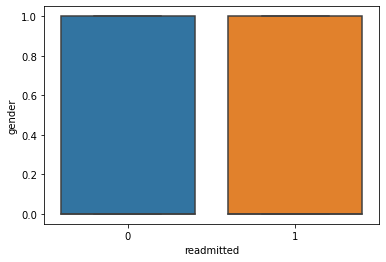

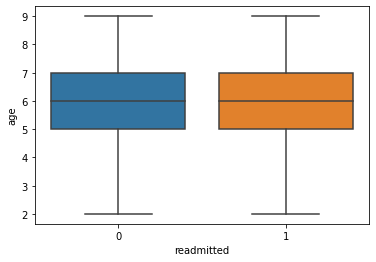

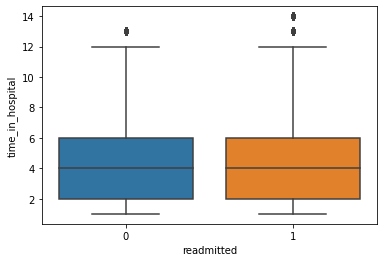

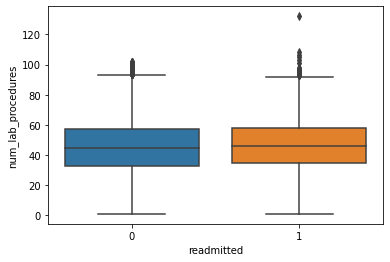

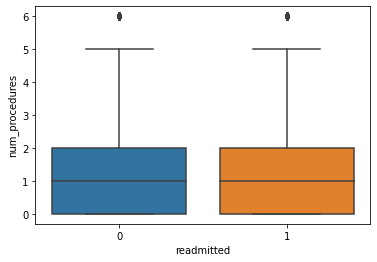

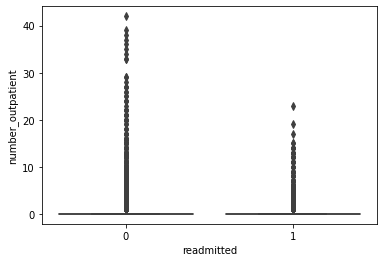

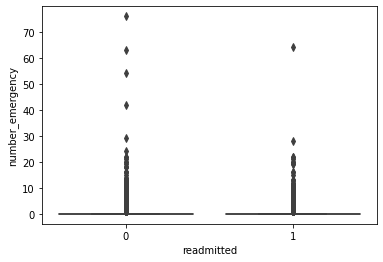

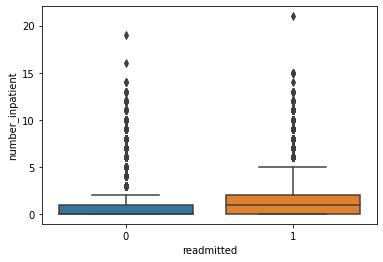

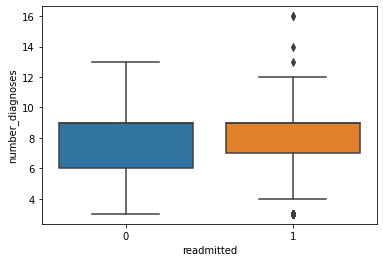

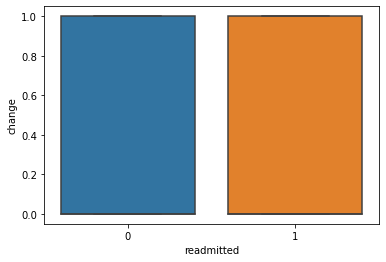

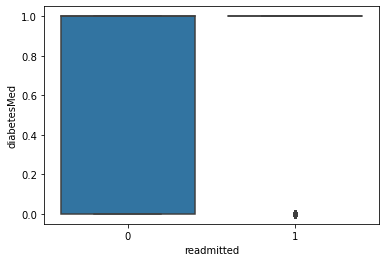

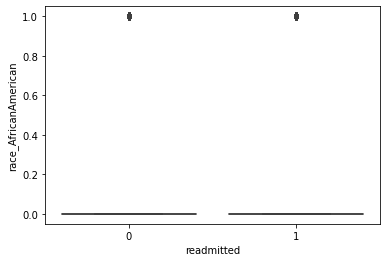

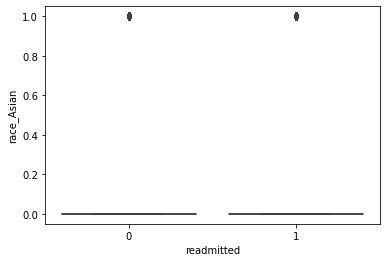

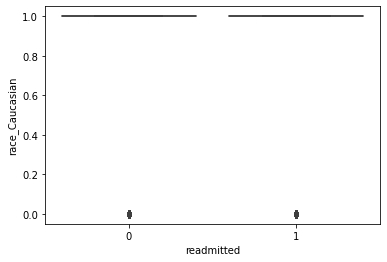

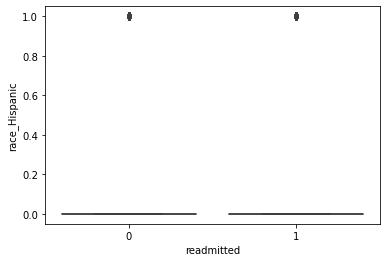

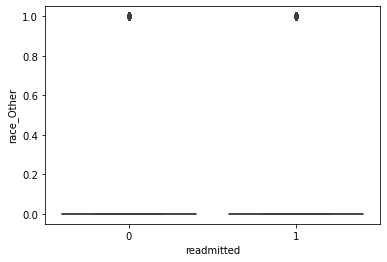

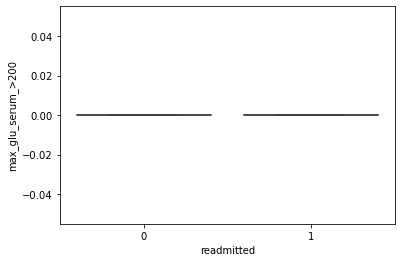

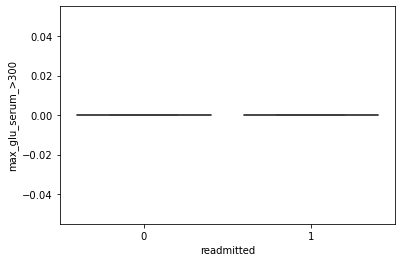

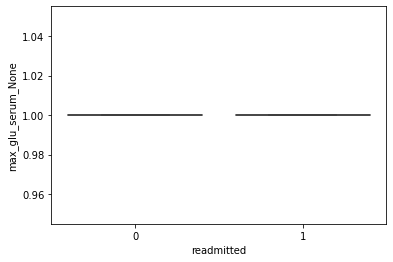

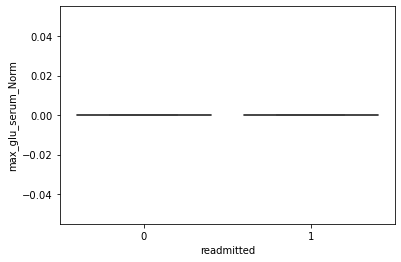

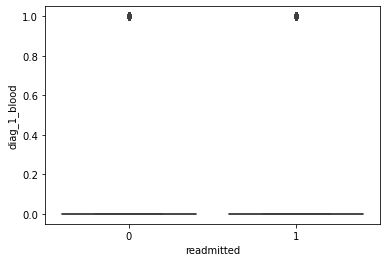

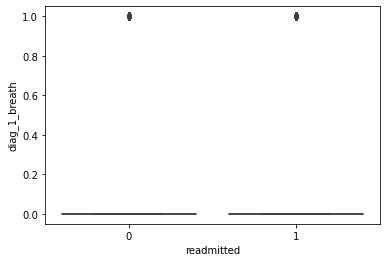

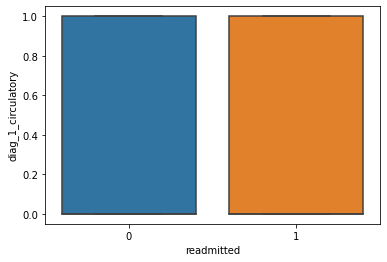

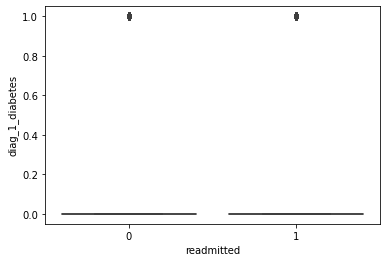

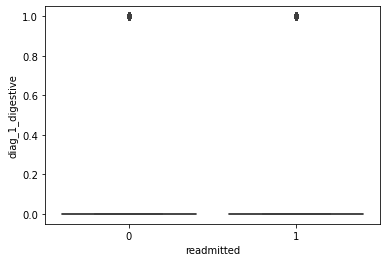

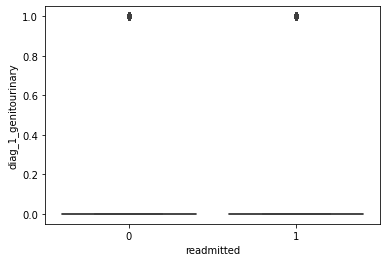

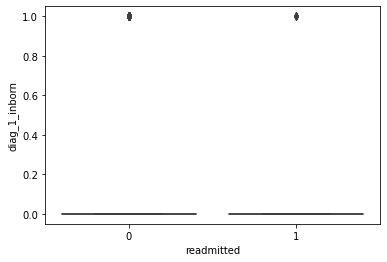

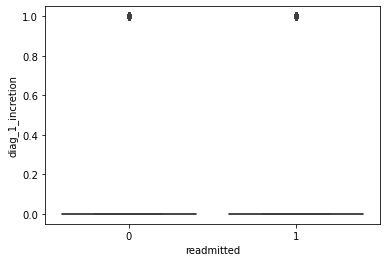

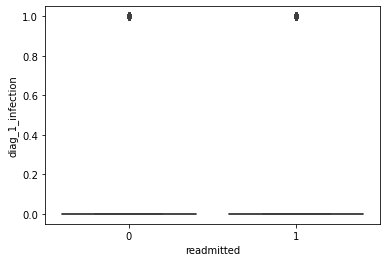

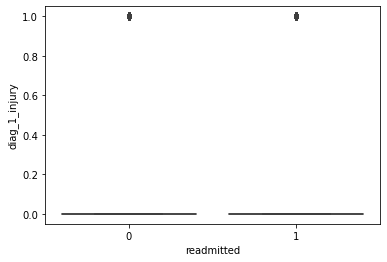

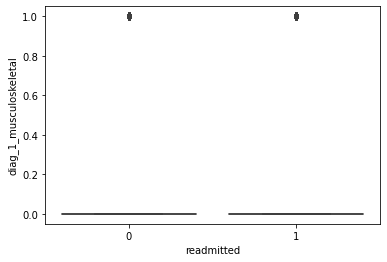

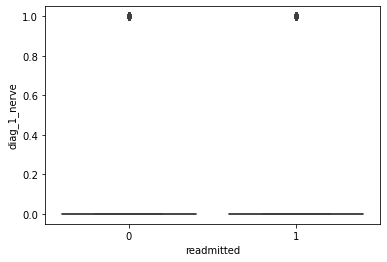

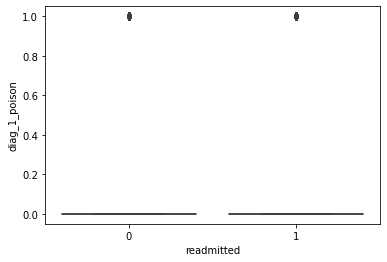

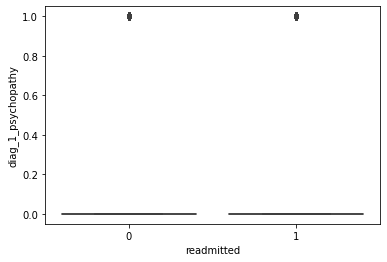

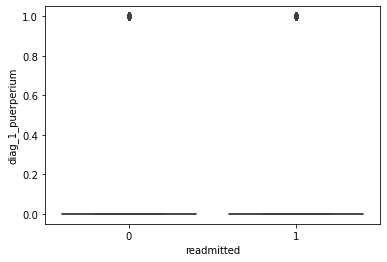

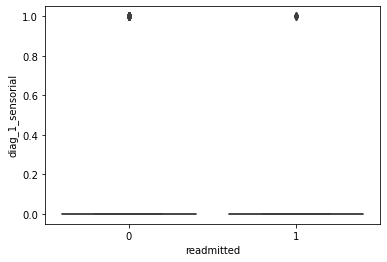

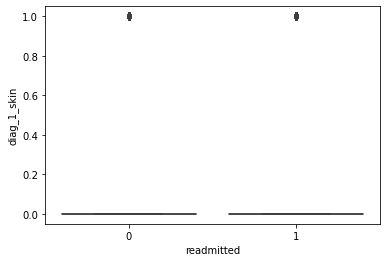

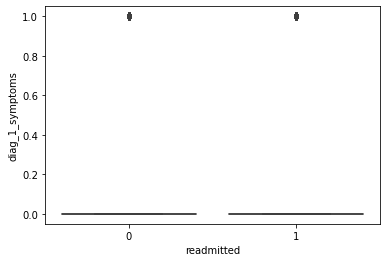

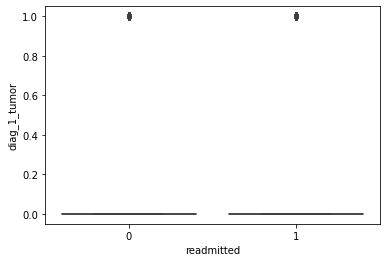

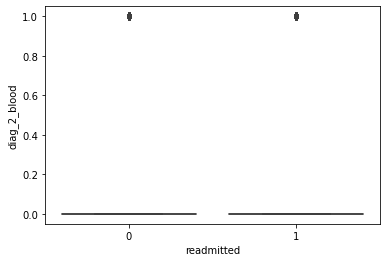

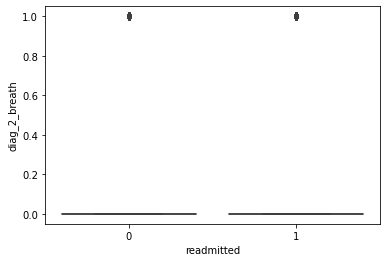

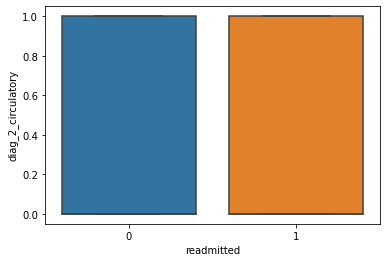

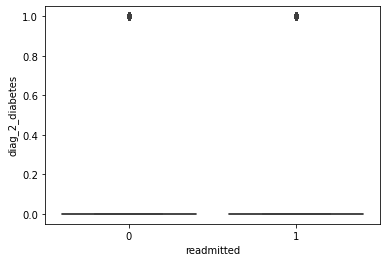

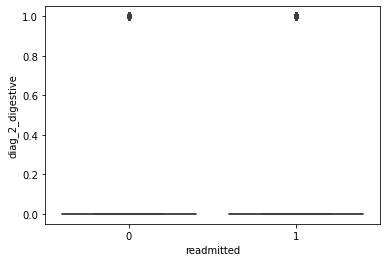

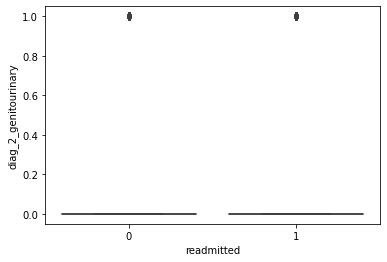

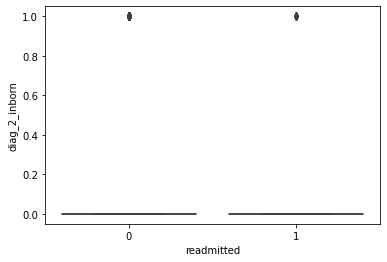

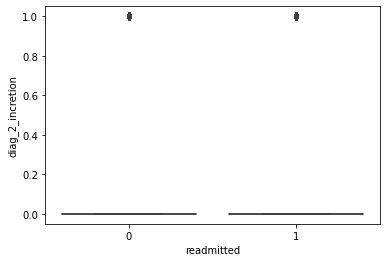

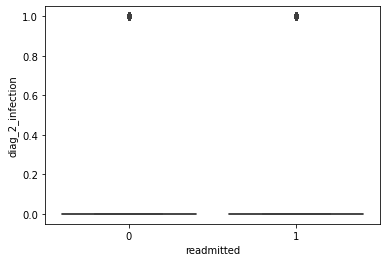

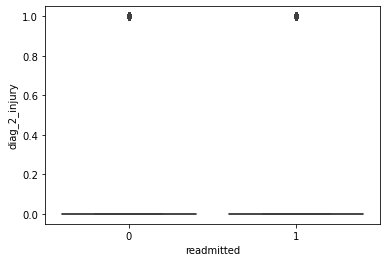

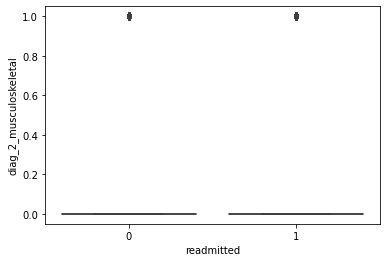

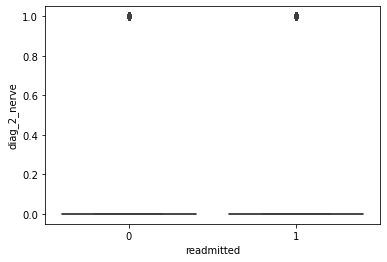

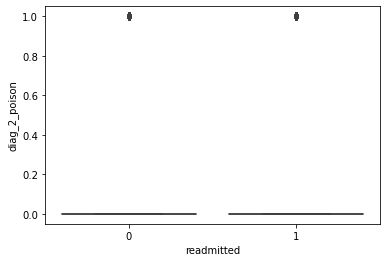

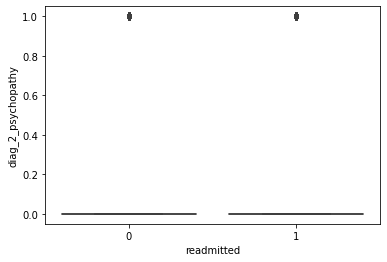

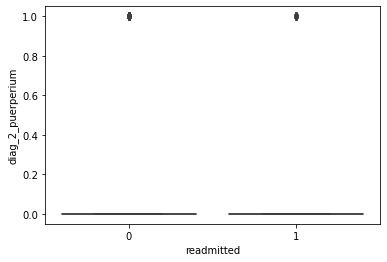

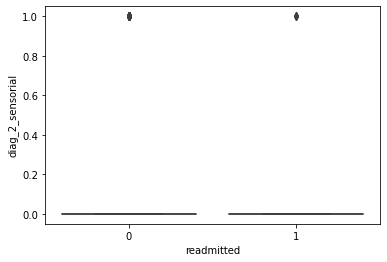

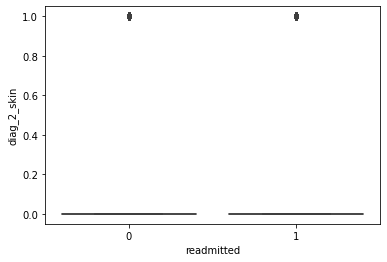

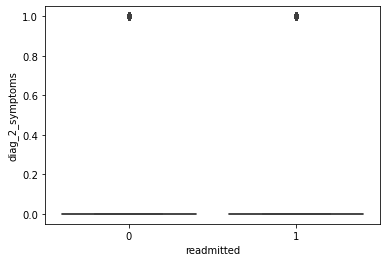

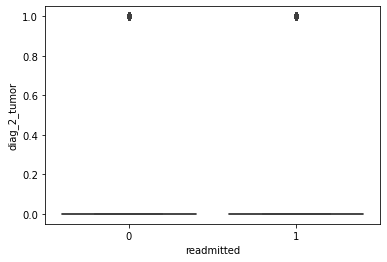

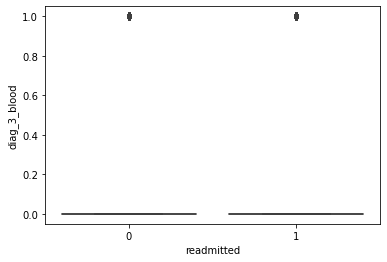

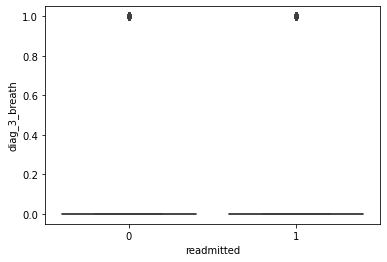

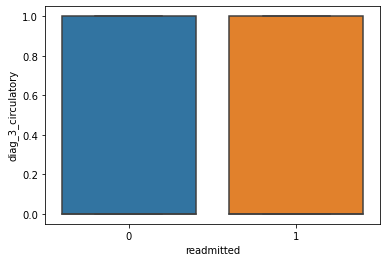

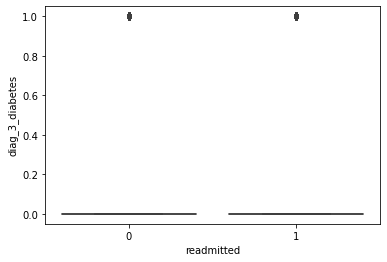

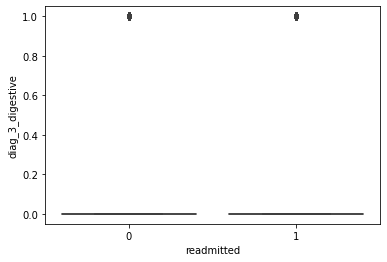

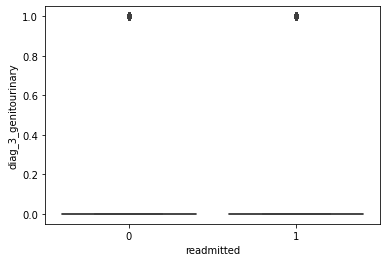

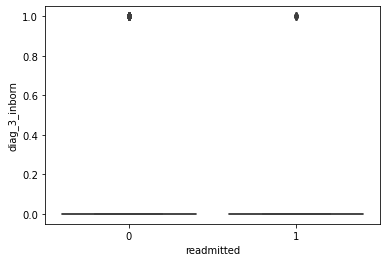

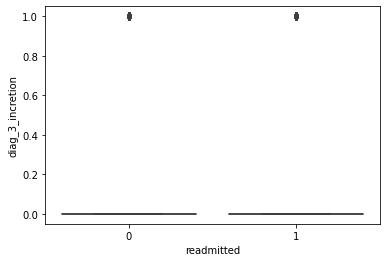

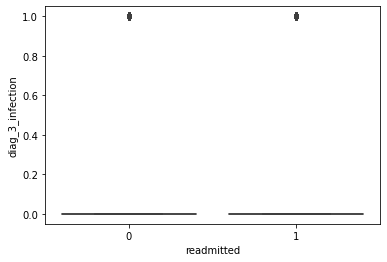

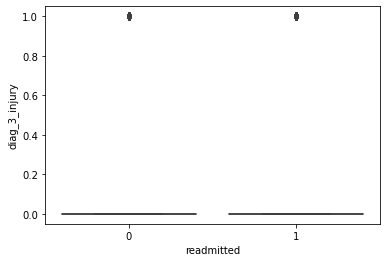

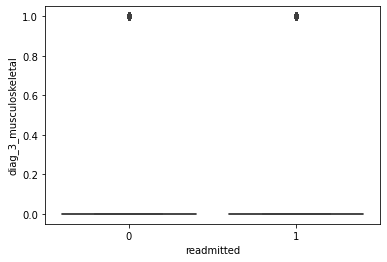

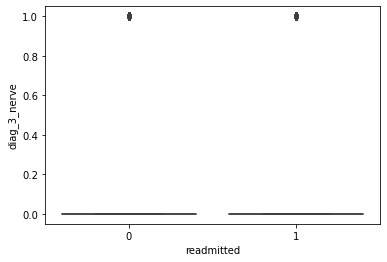

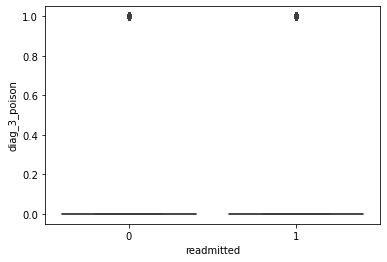

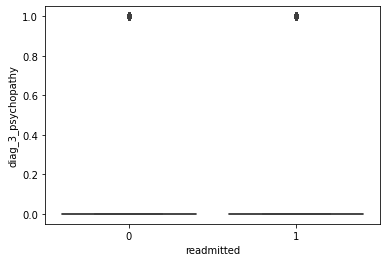

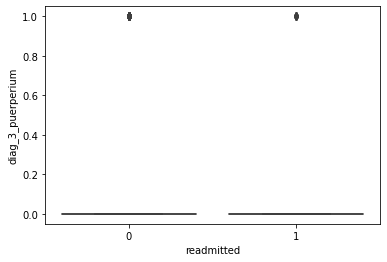

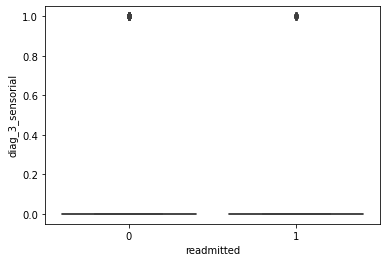

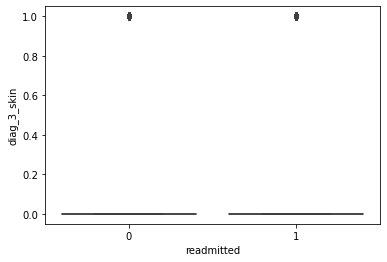

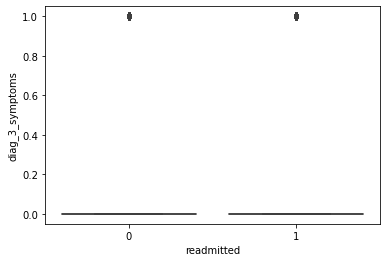

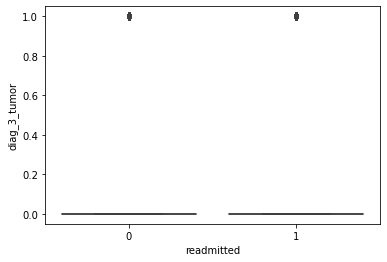

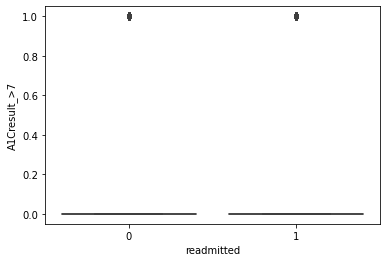

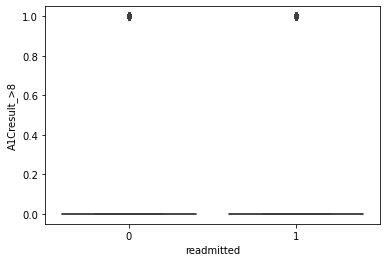

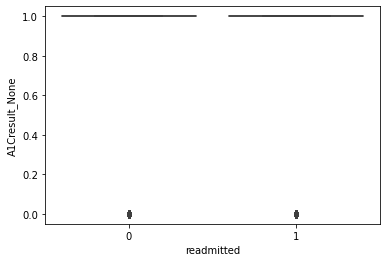

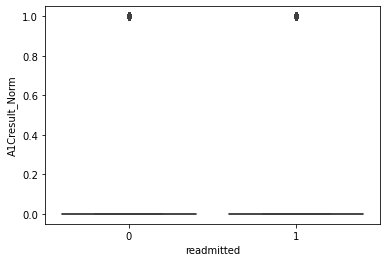

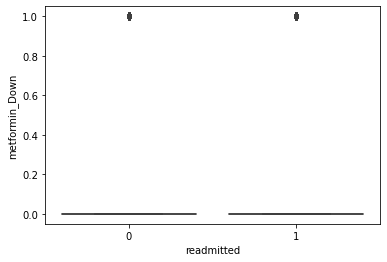

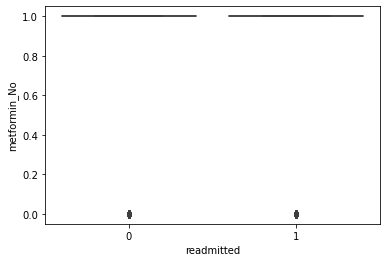

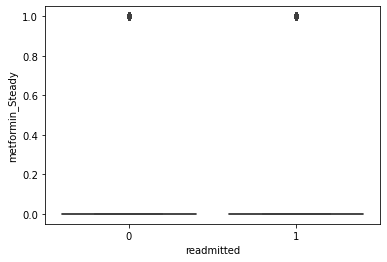

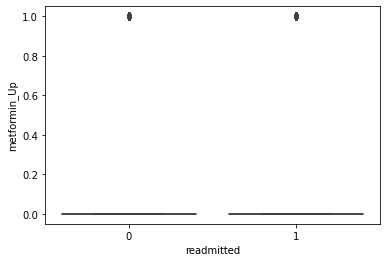

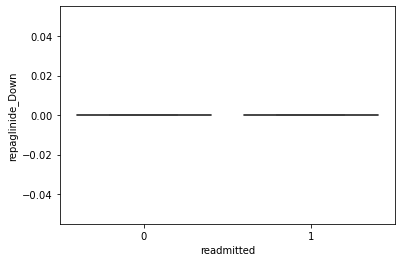

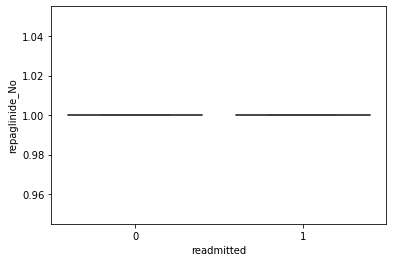

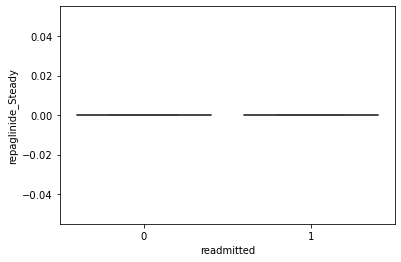

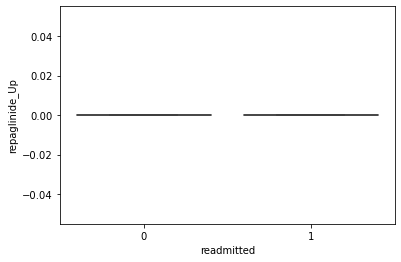

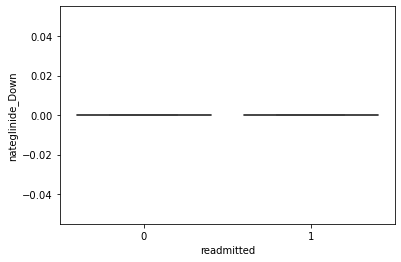

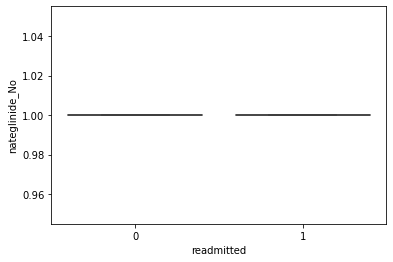

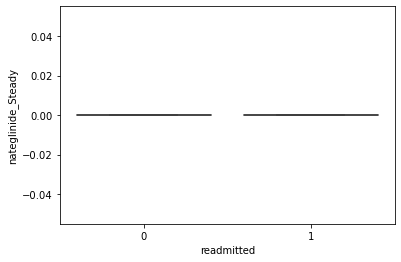

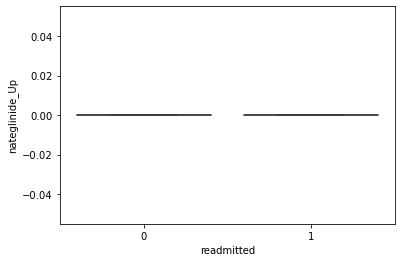

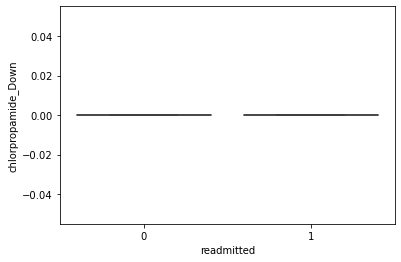

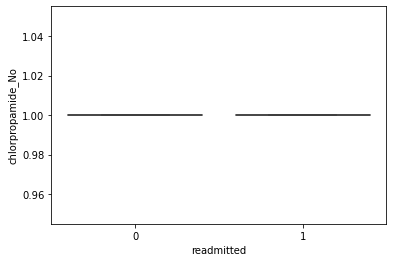

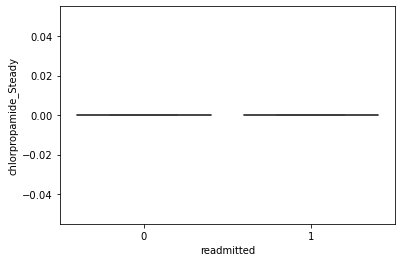

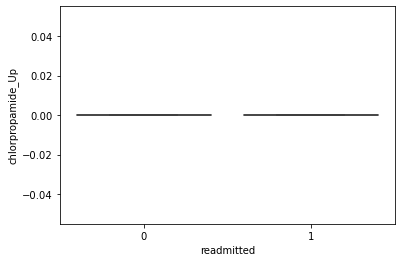

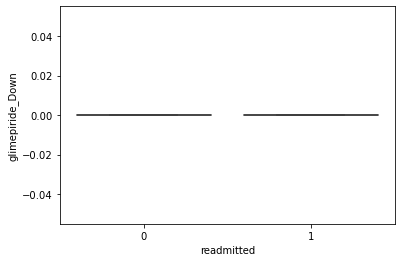

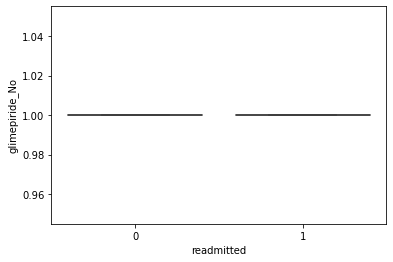

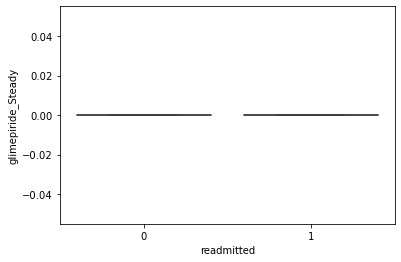

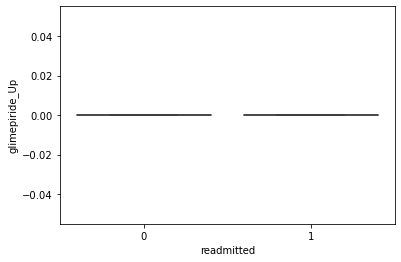

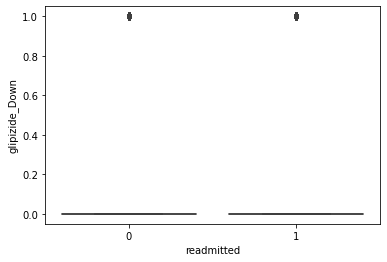

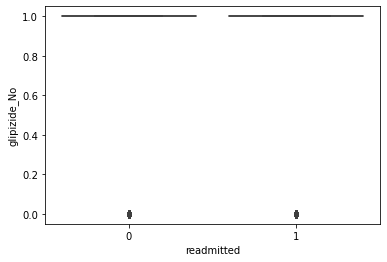

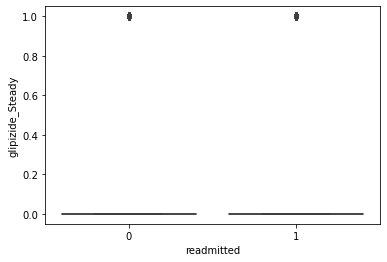

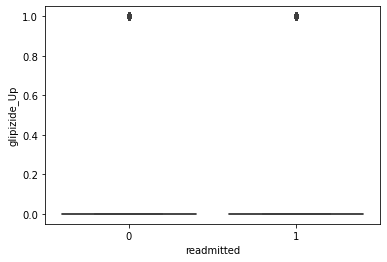

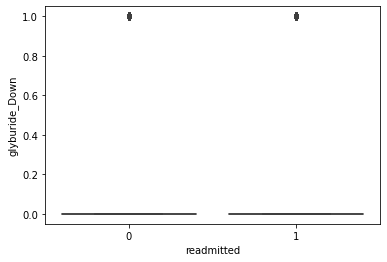

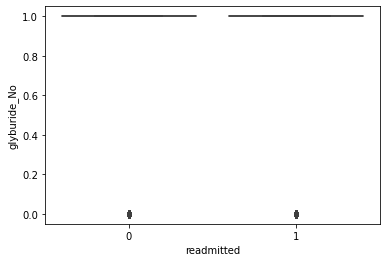

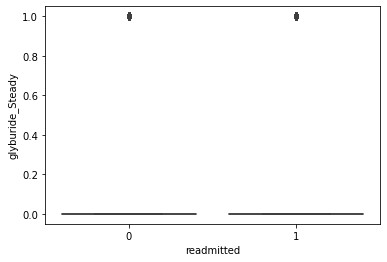

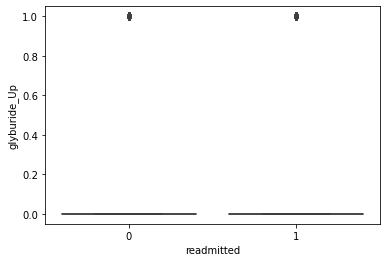

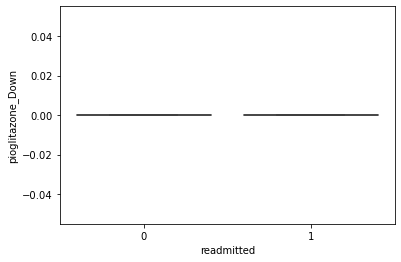

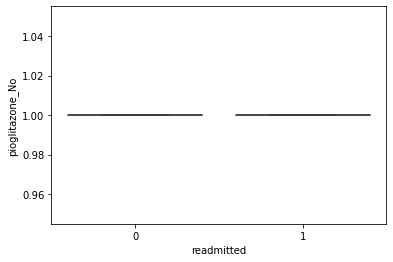

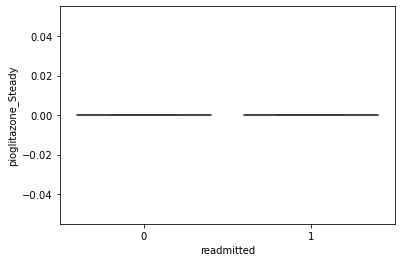

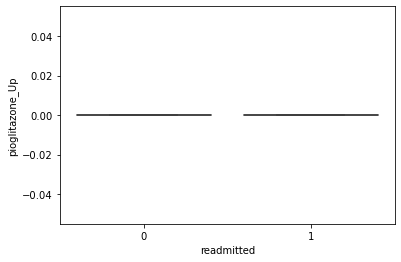

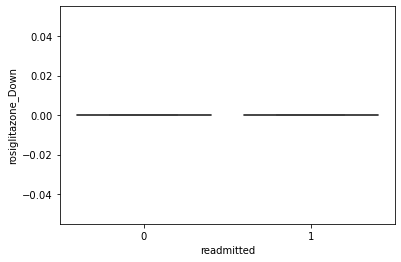

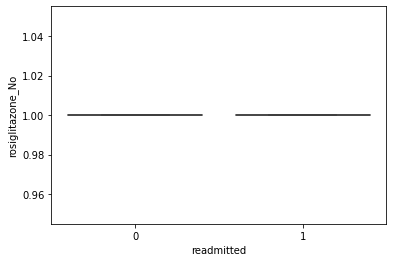

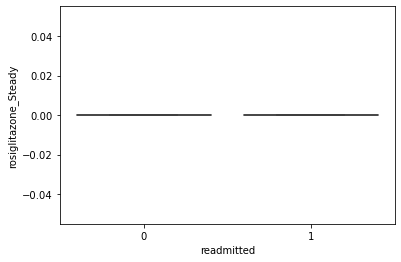

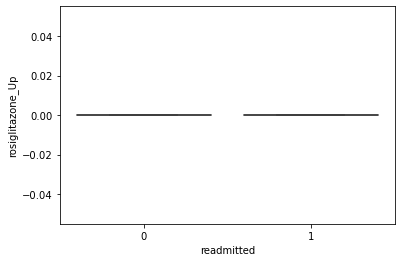

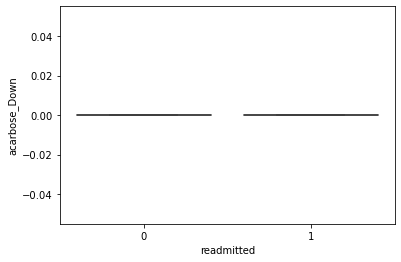

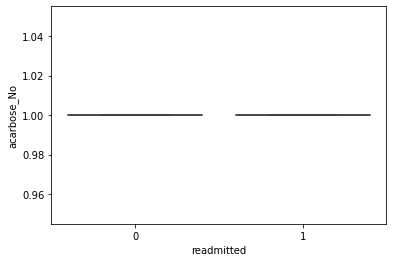

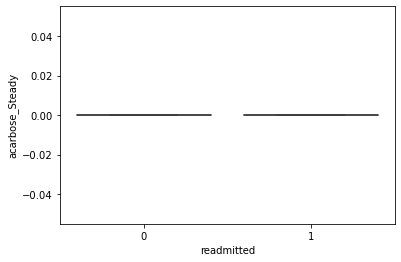

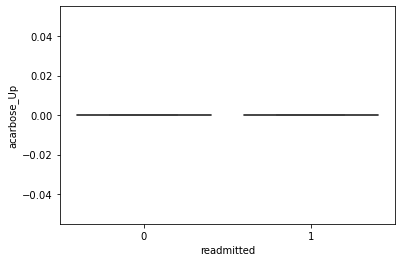

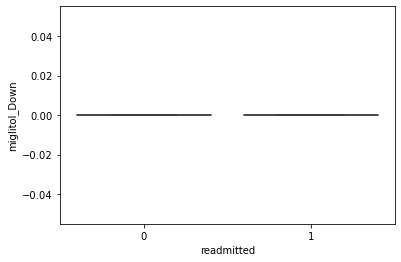

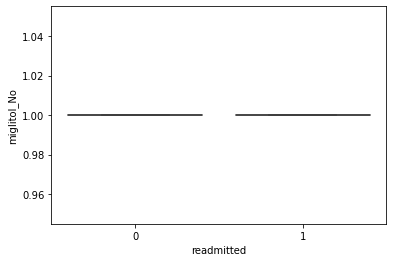

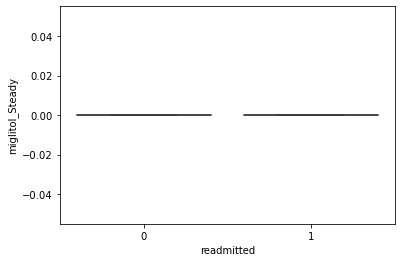

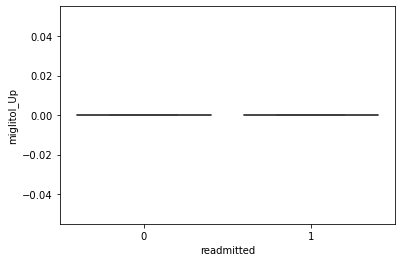

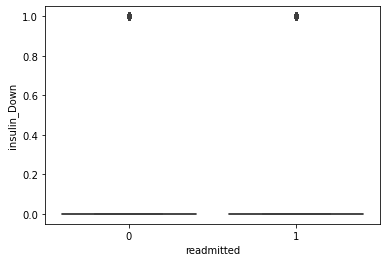

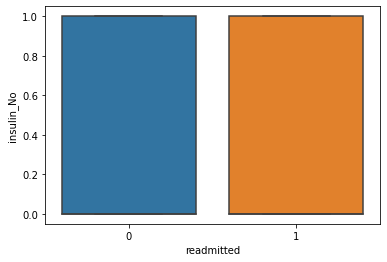

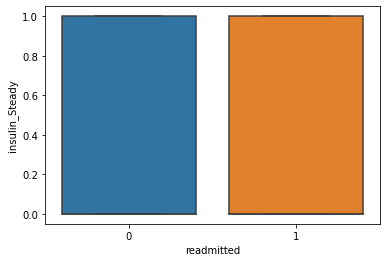

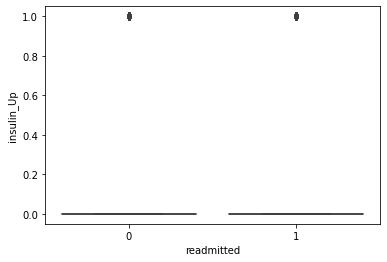

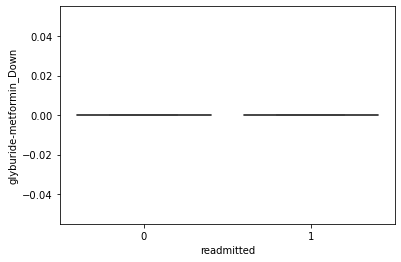

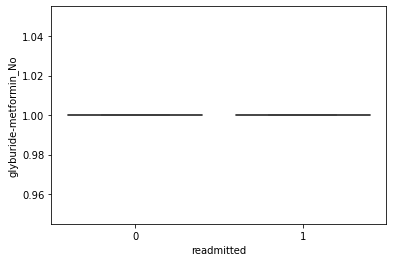

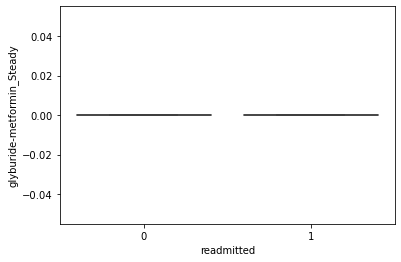

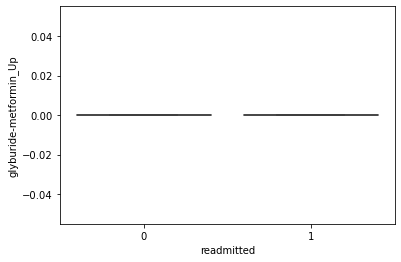

In [27]:
# box plot 한번에 찍기
cols = df.columns
for col in cols:
    if (col != "readmitted"):
        sns.boxplot(x="readmitted", y=str(col), data=df)
        plt.show()

데이터에서 X와 y를 분리 시킵니다

#- Scaling -
스케일링은 예를들어 집값의 범위는 100억~천만원 단위인데 BMI 값은 18~30이라 모델링할때 수치가 큰쪽으로 치우쳐
모델링이 잘 안되는것을 방지하기위해 설정한 범위 내의 값으로 변환 시켜줍니다. scaling model로는 StandardScaler를 씁니다.

fit_transform()은 fit() 과 transform() 함께 수행하는 메소드 입니다.

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != readmitted]
y = df.loc[:, df.columns == readmitted]

scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

이제 모델 학습에 들어 갑니다.

사용할 모델입니다.
 - LogisticRegression
 - RandomForest
 - DecisionTree

#- GridSearchCV -
GridSearchCV는 최적의 파라미터를 찾아주고 교차검증도 해줍니다.
여기서 파라미터란 모델에서 bias 값 즉 예측할때 가장 적합한 값을 찾아준다고 보면됩니다.
y = wX+b 에서 b값이라고 보면됩니다.

#- SMOTE -
y의 값이 불균형적이라 1의 값을 늘리고 0의 값을 줄이고 하는 복합적으로 불균형을 균형있게
맞출 수 있도록 SMOTE를 씁니다. SMOTE는 데이터를 늘리고 줄여서 데이터를 변화시키기 때문에
반드시 train 데이터셋에만 적용합니다. test값은 실제로 테스트해봐야하기 때문에 그데로 보존
하여야 합니다.

In [29]:
############################################################
######################## 모델 학습 ###########################
############################################################
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

def fitClasifiers(gs_clfs, X, y):
    for clf in gs_clfs:
        print(X.shape)
        clf.fit(X, y)

def showGridsearchResult(gs_clfs):
    estimators = []
    scores = []
    params = []

    for clf in gs_clfs:
        estimators.append(str(clf.estimator))
        scores.append(clf.best_score_)
        params.append(clf.best_params_)

    for i, val in enumerate(estimators):
        print(val)
        print(scores[i])
        print(params[i])

X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size=0.2, stratify=y)

# 모델설정
sm = SMOTE(random_state=42)

# SMOTE under sampling
X_train, y_train = sm.fit_resample(X_train, y_train)

lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

param_lr = {"penalty": ["l2"]}
param_tree = {"max_depth": [3, 4, 5, 6], "min_samples_split": [2, 3]}

gs_lr = GridSearchCV(lr, param_grid=param_lr, cv=5, refit=True)
gs_dt = GridSearchCV(dt, param_grid=param_tree, cv=5, refit=True)
gs_rf = GridSearchCV(rf, param_grid=param_tree, cv=5, refit=True)

gs_clfs = [gs_lr, gs_dt, gs_rf]

fitClasifiers(gs_clfs, X_train, y_train.values.ravel())
showGridsearchResult(gs_clfs)

(103098, 133)
(103098, 133)
(103098, 133)
LogisticRegression()
0.6104677101139706
{'penalty': 'l2'}
DecisionTreeClassifier()
0.8260109692316687
{'max_depth': 6, 'min_samples_split': 2}
RandomForestClassifier()
0.8154093159111531
{'max_depth': 6, 'min_samples_split': 3}


##################################
###### LogisticRegression ########
##################################
### LogisticRegression show_metrics ###
[[8318 4569]
 [ 788  886]]
Acc : 0.6320994437195248
precision : 0.16241979835013748
recall : 0.5292712066905615
### LogisticRegression showPrecisionRecallCurve ###
th val : [0.09521854 0.09818873 0.10313902 0.10415939]
precision val : [0.11516236 0.11510148 0.1151094  0.11511732]
recalls val : [1.         0.99940263 0.99940263 0.99940263]


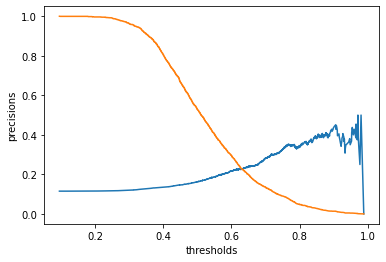

### LogisticRegression showRocCurve ###
fpr val : [0.00000000e+00 7.75975790e-05 7.75975790e-05 2.32792737e-04]
tpr val : [0.         0.         0.00059737 0.00059737]
thresholds val : [1.98843633 0.98843633 0.98041259 0.97705617]


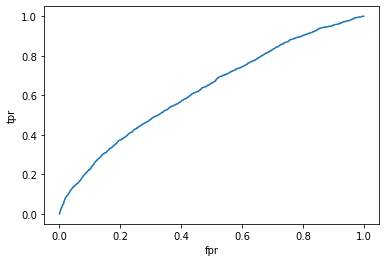

roc_score : 0.6284702550494283
 

 

##################################
######### RANDOM FOREST ##########
##################################
### RANDOM FOREST showMetrics ###
[[10480  2407]
 [ 1114   560]]
Acc : 0.7581896847743974
precision : 0.1887428378833839
recall : 0.3345280764635603
### RANDOM FOREST showPrecisionRecallCurve ###
th val : [0.17188809 0.17308093 0.17475311 0.17604969]
precision val : [0.11501202 0.11495122 0.11495911 0.11496701]
recalls val : [1.         0.99940263 0.99940263 0.99940263]


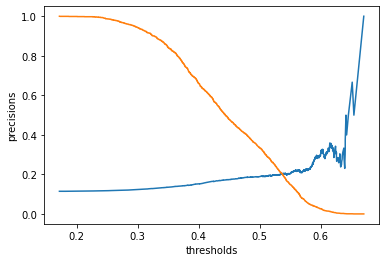

### RANDOM FOREST showRocCurve ###
fpr val : [0.0000000e+00 0.0000000e+00 7.7597579e-05 7.7597579e-05]
tpr val : [0.         0.00059737 0.00059737 0.00119474]
thresholds val : [1.67076853 0.67076853 0.65456532 0.65181263]


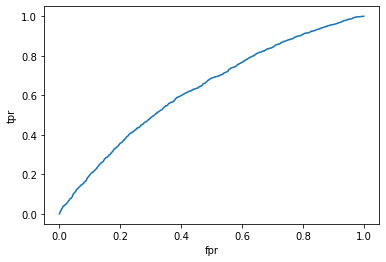

roc_score : 0.6315111159690718
 

 

##################################
######### DecisionTree ###########
##################################
### DecisionTree showMetrics ###
[[12106   781]
 [ 1394   280]]
Acc : 0.8506283909072179
precision : 0.2639019792648445
recall : 0.16726403823178015
### DecisionTree showPrecisionRecallCurve ###
th val : [0.06106295 0.10238216 0.11199001 0.11283498]
precision val : [0.11496463 0.11821385 0.12208452 0.12428652]
recalls val : [1.         0.98207885 0.9474313  0.92353644]


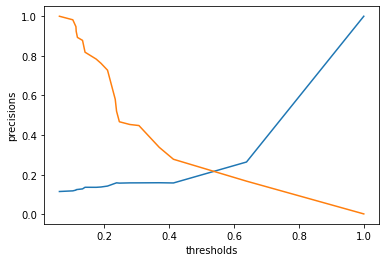

### DecisionTree showRocCurve ###
fpr val : [0.         0.         0.06060371 0.19213161]
tpr val : [0.         0.00179211 0.16726404 0.27777778]
thresholds val : [2.         1.         0.63820018 0.41279743]


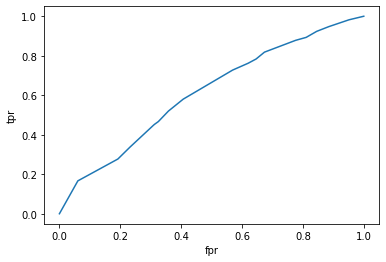

roc_score : 0.6120967486985254


In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.metrics import recall_score, precision_score, roc_curve
from sklearn.metrics import precision_recall_curve

def showMetrics(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(confusion)
    print("Acc : {}".format(accuracy))
    print("precision : {}".format(precision))
    print("recall : {}".format(recall))

def showPrecisionRecallCurve(y_test, prob_positive_pred):
    precisions, recalls, thresholds = precision_recall_curve(y_test, prob_positive_pred)
    print("th val : {}".format(thresholds[:4]))
    print("precision val : {}".format(precisions[:4]))
    print("recalls val : {}".format(recalls[:4]))

    df = {
        "thresholds": thresholds,
        "precisions": precisions[:-1],
        "recalls": recalls[:-1]
    }
    df = pd.DataFrame.from_dict(df)

    sns.lineplot(x="thresholds", y="precisions", data=df)
    sns.lineplot(x="thresholds", y="recalls", data=df)
    plt.show()

def showRocCurve(y_test, prob_positive_pred):
    fpr, tpr, thresholds = roc_curve(y_test, prob_positive_pred)

    print("fpr val : {}".format(fpr[:4]))
    print("tpr val : {}".format(tpr[:4]))
    print("thresholds val : {}".format(thresholds[:4]))

    df = {"threshold": thresholds, "fpr": fpr, "tpr": tpr}
    df = pd.DataFrame.from_dict(df)
    sns.lineplot(x="fpr", y="tpr", data=df)
    plt.show()

    roc_score = roc_auc_score(y_test, prob_positive_pred)
    print("roc_score : " + str(roc_score))

print('##################################')
print('###### LogisticRegression ########')
print('##################################')

y_pred = gs_lr.predict(X_test)
pred_prob = gs_lr.predict_proba(X_test)
print("### LogisticRegression show_metrics ###")
showMetrics(y_test, y_pred)

y_pred = np.concatenate([pred_prob, y_pred.reshape(-1, 1)], axis=1)
prob_positive_pred = y_pred[:, 1]
print("### LogisticRegression showPrecisionRecallCurve ###")
showPrecisionRecallCurve(y_test, prob_positive_pred)

print("### LogisticRegression showRocCurve ###")
showRocCurve(y_test, prob_positive_pred)

print(' \n')
print(' \n')

print('##################################')
print('######### RANDOM FOREST ##########')
print('##################################')

y_pred = gs_rf.predict(X_test)
pred_prob = gs_rf.predict_proba(X_test)
print("### RANDOM FOREST showMetrics ###")
showMetrics(y_test, y_pred)

y_pred = np.concatenate([pred_prob, y_pred.reshape(-1, 1)], axis=1)
prob_positive_pred = y_pred[:, 1]
print("### RANDOM FOREST showPrecisionRecallCurve ###")
showPrecisionRecallCurve(y_test, prob_positive_pred)

print("### RANDOM FOREST showRocCurve ###")
showRocCurve(y_test, prob_positive_pred)

print(' \n')
print(' \n')

print('##################################')
print('######### DecisionTree ###########')
print('##################################')

y_pred = gs_dt.predict(X_test)
pred_prob = gs_dt.predict_proba(X_test)
print("### DecisionTree showMetrics ###")
showMetrics(y_test, y_pred)

y_pred = np.concatenate([pred_prob, y_pred.reshape(-1, 1)], axis=1)
prob_positive_pred = y_pred[:, 1]
print("### DecisionTree showPrecisionRecallCurve ###")
showPrecisionRecallCurve(y_test, prob_positive_pred)

print("### DecisionTree showRocCurve ###")
showRocCurve(y_test, prob_positive_pred)

### showMetrics ###
[[79 10]
 [24 33]]
Acc : 0.7671232876712328
precision : 0.7674418604651163
recall : 0.5789473684210527

# 위의 결과에서
    0   1
 0  79  10
 1  23  33

79 + 10 + 23 + 33 = 145 (test data 총 갯수 )

79: TN(true negative) / 실제 값이 0(negative)인데 0이라고 맞춘 갯수
10 : FN(false negative) / 실제 값이 0(negative)인데 1이라고 틀린 갯수
23: FP(false positive) / 실제 값이 1(positive)인데 0이라고 틀린 갯수
33 : TP(true positive) / 실제 값이 1(positive)인데 1이라고 맞춘 갯수

Acc는 전체 145개에서 79+33 맞춘 퍼센테이지이고
precision은 TP/(FP+TP)이며 33/(23+33) 입니다.
헬스케어 데이터에서는 질병이 걸렸느냐 안걸렸느냐, 이번 데이터에서는 30일 이내에 재방문 했느냐 안했느냐가 중요합니다.
따라서 1의 값을 얼마나 잘 맞추었냐가 더 중요합니다. 1의 값을 맞춘 비율이 precision입니다.

Acc로 판단했을때의 위험요소는 만약 1000개의 데이터에서 900개가 0이고 100개가 1일때(inbalance data)
1을 맞추지 않고 전부 0이라고 예측해버리면 90퍼센트의 정확도가 나오기 때문에 Acc로 판단하기는 위험합니다.

recall은 TP/(FN+TP)이며 1이라고 예측한 값이 10과 33이 있으며 이중에서 얼마나 질병이 걸렸는지
잘 예측했는지 보는 결과입니다.

#- showPrecisionRecallCurve -
th val : [0.04994261 0.06008972 0.0710064  0.07128134]
precision val : [0.44186047 0.4375     0.44094488 0.43650794]
recalls val : [1.         0.98245614 0.98245614 0.96491228]

* fpr : false positive rate
* tpr : true positive rate

precisions :
결론적으로 acc값보다 auc(roc_curve)값이 더 중요합니다.
thresholds를 만약 0.3으로 정했다면 예측값은 확률로 나오는데 만약 질병이 걸렸다고 예측하는 확률이
0.4라면 질병이 걸렸다고 1이라고 값을 반환한다. 즉 thresholds는 걸렸다 안걸렸다를 확실하게 구분해주는
기준치라고 보면됩니다.
그럼 thresholds가 1이라면 당연히 0.99의 확률로 병에 걸렸다고 예측하여도 0의 값이 나오는 것이다.
show_precision_recall_curve의 그래프 교차지점의 thresholds의 값이 가장 적합한 기준치라고 봐도됩니다.

roc_score이 결국 예측을 얼마나 잘 했느냐입니다.



